<a href="https://colab.research.google.com/github/nhaandq/AI_project-FruitDetection/blob/main/Fruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import os
import pickle
from os import listdir
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Flatten, Dense, Dropout, Conv2D, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.models import Model, load_model, Sequential
from keras.preprocessing.image import  img_to_array
from google.colab.patches import cv2_imshow
#from tensorflow.keras.optimizers import SGD

In [3]:
raw_folder = '/content/drive/MyDrive/Fruit/Training_data/'

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
X = []
y = []
classes = []
i=0

for folder in listdir(raw_folder):
  print("Folder=",folder)
  for file in listdir(raw_folder + folder):
    print("File=", file)
    X.append(cv.resize(cv.imread(raw_folder+ folder +"/" +file, cv.IMREAD_COLOR),dsize=(150,150)))
    y.append(i)
  
  classes.append(folder)
  i+=1

Folder= Mango
File= mango (82).jpg
File= mango (72).jpg
File= mango (42).jpg
File= mango (69).jpg
File= mango (112).jpg
File= mango (54).jpg
File= mango (81).jpg
File= mango (45).jpg
File= mango (97).jpg
File= mango (75).jpg
File= mango (46).jpg
File= mango (105).jpg
File= mango (104).jpg
File= mango (58).jpg
File= mango (78).jpg
File= mango (79).jpg
File= mango (114).jpg
File= mango (116).jpg
File= mango (65).jpg
File= mango (59).jpg
File= mango (106).jpg
File= mango (44).jpg
File= mango (92).jpg
File= mango (98).jpg
File= mango (84).jpg
File= mango (107).jpg
File= mango (52).jpg
File= mango (66).jpg
File= mango (41).jpg
File= mango (70).jpg
File= mango (83).jpg
File= mango (103).jpg
File= mango (102).jpg
File= mango (43).jpg
File= mango (113).jpg
File= mango (68).jpg
File= mango (95).jpg
File= mango (74).jpg
File= mango (48).jpg
File= mango (71).jpg
File= mango (111).jpg
File= mango (77).jpg
File= mango (89).jpg
File= mango (55).jpg
File= mango (109).jpg
File= mango (90).jpg
File= ma

In [7]:
X = np.array(X)
y = np.array(y)
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)

# Tạo tệp TrainTest trong GDrive, sau đó lưu dữ liệu X,y và0
file = open('/content/drive/MyDrive/Fruit/TrainTest', 'wb')
pickle.dump((X,y), file)
file.close()

In [8]:
# Load X, y từ file TrainTest
file = open('/content/drive/MyDrive/Fruit/TrainTest', 'rb')
(X, y) = pickle.load(file)
file.close()

print(X.shape)
print(y.shape)
print(classes)

(1564, 150, 150, 3)
(1564, 10)
['Mango', 'Watermelon', 'Tomato', 'Pineapple', 'Banana', 'Lemon', 'Orange', 'Potato', 'Strawberry', 'Starfruit']


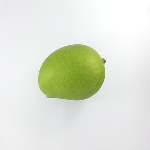

[1 0 0 0 0 0 0 0 0 0]
Mango


In [9]:
cv2_imshow(X[1])
print(y[1])
print(classes[np.argmax(y[1])])

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1251, 150, 150, 3)
(1251, 10)
(313, 150, 150, 3)
(313, 10)


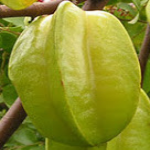

[0 0 0 0 0 0 0 0 0 1]
Starfruit


In [11]:
cv2_imshow(X_train[100])
print(y_train[100])
print(classes[np.argmax(y_train[100])])

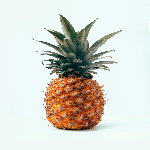

[0 0 0 1 0 0 0 0 0 0]
Pineapple


In [12]:
cv2_imshow(X_test[1])
print(y_test[1])
print(classes[np.argmax(y_test[1])])

In [13]:
X_train1 = X_train.astype('float32')
X_test1 = X_test.astype('float32')

In [15]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150,3) ) )
model.add(MaxPooling2D( (2,2) ) )

model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same' ) )
model.add(MaxPooling2D( (2,2) ) )

model.add(Flatten())

model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [16]:
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
  rescale=1./255, width_shift_range=0.1, height_shift_range=0.1,
	horizontal_flip=True, brightness_range=[0.2,1.5], fill_mode="nearest")

In [18]:
filepath="weights-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [20]:
#opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(aug.flow(X_train1, y_train, batch_size=64), epochs=10, 
                          validation_data=aug.flow(X_test1,y_test,batch_size=len(X_test)),
                          callbacks=callbacks_list,verbose = 1)

Epoch 1/10
20/20 [==============================] - ETA: 0s - loss: 0.7107 - accuracy: 0.7986
Epoch 1: val_accuracy improved from 0.86901 to 0.87859, saving model to weights-01-0.88.hdf5
20/20 [==============================] - 41s 2s/step - loss: 0.7107 - accuracy: 0.7986 - val_loss: 0.4969 - val_accuracy: 0.8786
Epoch 2/10
20/20 [==============================] - ETA: 0s - loss: 0.4377 - accuracy: 0.8745
Epoch 2: val_accuracy improved from 0.87859 to 0.89137, saving model to weights-02-0.89.hdf5
20/20 [==============================] - 41s 2s/step - loss: 0.4377 - accuracy: 0.8745 - val_loss: 0.3434 - val_accuracy: 0.8914
Epoch 3/10
20/20 [==============================] - ETA: 0s - loss: 0.3523 - accuracy: 0.9057
Epoch 3: val_accuracy improved from 0.89137 to 0.91054, saving model to weights-03-0.91.hdf5
20/20 [==============================] - 40s 2s/step - loss: 0.3523 - accuracy: 0.9057 - val_loss: 0.2756 - val_accuracy: 0.9105
Epoch 4/10
20/20 [==============================] - 

In [21]:
model.load_weights("weights-08-0.95.hdf5")

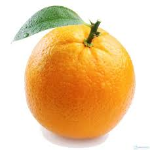

[[1.6675000e-04 1.4047667e-13 8.2738344e-11 4.3070402e-05 1.2799902e-06
  4.4713664e-07 9.9898559e-01 6.1222964e-11 6.3273568e-08 8.0285821e-04]]
Orange


In [75]:
img = cv.resize(cv.imread('/content/drive/MyDrive/Fruit/Test/cam.jpg', cv.IMREAD_COLOR),dsize=(150,150))
cv2_imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
print(model.predict(img))
print(classes[np.argmax(model.predict(img))])

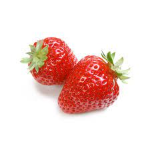

[[1.7544618e-12 4.8655260e-18 6.9546620e-13 1.7438653e-05 6.2435708e-12
  3.4212867e-19 1.4765799e-06 1.7710515e-11 9.9998105e-01 2.0693590e-13]]
Strawberry


In [76]:
img = cv.resize(cv.imread('/content/drive/MyDrive/Fruit/Test/dautay.jpg', cv.IMREAD_COLOR),dsize=(150,150))
cv2_imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255
print(model.predict(img))
print(classes[np.argmax(model.predict(img))])